## Import Libraries

In [233]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [148]:
mnist = mnist.load_data()

- Load data into mnist variable.

In [151]:
(x_train_full, y_train_full), (x_test, y_test) = mnist

- Provided data for training and testing.

In [154]:
x_train_full.shape

(60000, 28, 28)

## Domain Analysis

- Definition: Handwritten Digits Recognition involves using algorithms to identify and classify numerical digits (0-9) written by hand from scanned images or photographs.
- Purpose: Automate the recognition process for applications such as document digitization, postal services, banking, and education.
- Core Problem: Variability in handwriting styles, noise in data, and distortions make accurate recognition challenging.


## Visualize the data

In [159]:
fig = plt.figure(figsize=(28,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[i]))

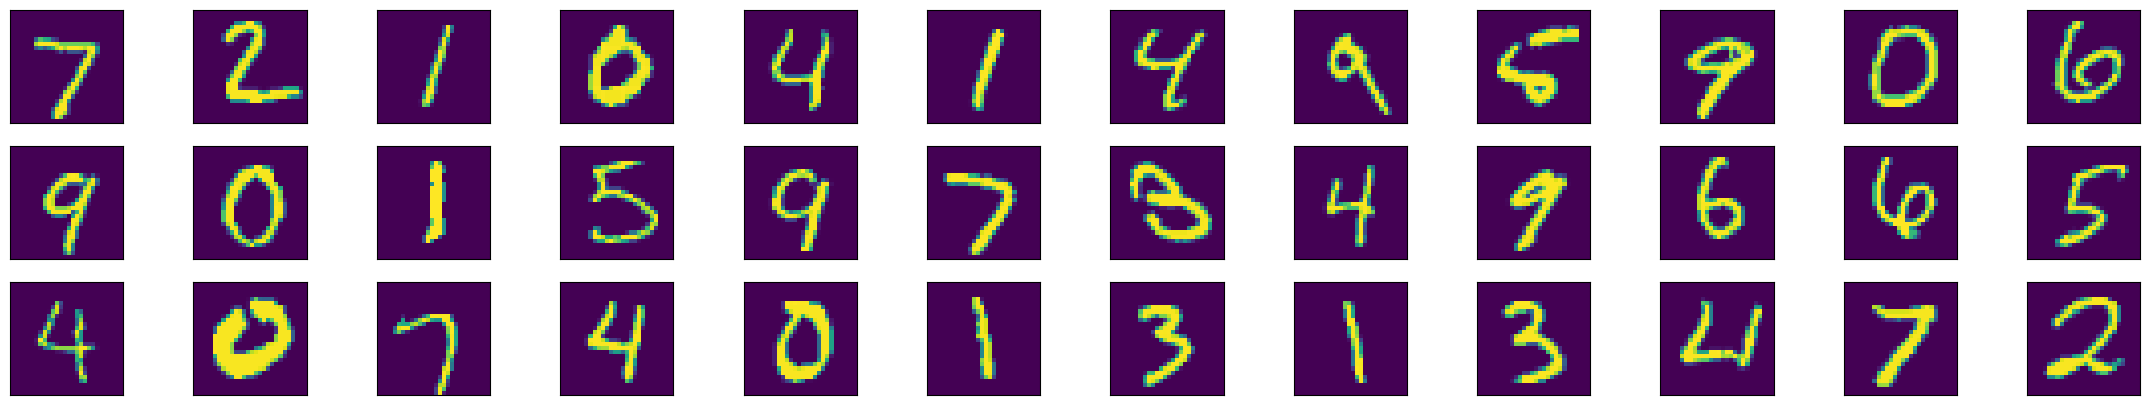

In [161]:
fig

- There are some handwritten digits like, 7,2,1 and so on.

In [164]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Break dataset into training and testing, and validation sets.

In [167]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [169]:
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]

print(x_train.shape,'x train samples')
print(y_train.shape,'y train samples')
print(x_valid.shape,'x validation samples')
print(y_valid.shape,'y validation samples')
print(x_test.shape,'x test samples')
print(y_test.shape,'y test samples')

(55000, 28, 28) x train samples
(55000,) y train samples
(5000, 28, 28) x validation samples
(5000,) y validation samples
(10000, 28, 28) x test samples
(10000,) y test samples


- Break training set into training and validation sets

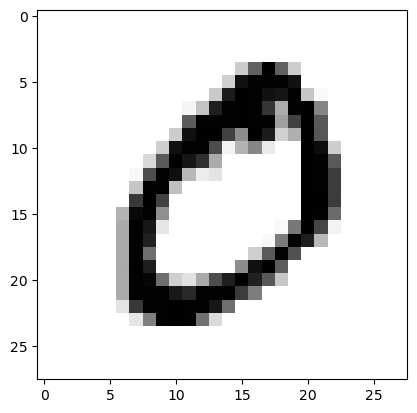

In [174]:
plt.imshow(x_train[1], cmap = 'binary')
plt.show()

- x_train index 1 have '0' handwritten value

## Normalize Pixel

In [178]:
# Scaling the data
x_train, x_valid, x_test = x_train / 255., x_valid / 255., x_test / 255.

In [180]:
# Convert y_train, y_test, y_valid data into categorical

from tensorflow.keras.utils import to_categorical

num_classes = 10

y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes)

In [182]:
y_train_encoded[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## Create Sequential Model

In [185]:
import s as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, InputLayer
tf.random.set_seed(42)
model = Sequential()
model.add(InputLayer(input_shape = [28, 28]))
model.add(Flatten())
model.add(Dense(400, activation = "relu"))
model.add(Dense(200, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(10, activation = "sigmoid"))

In [187]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,860 (1.60 MB)

 Trainable params: 419,860 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [189]:
# Compile the model
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ['accuracy'])

## Train the model

In [220]:
# Train the model
history = model.fit(x_train, y_train_encoded, epochs = 20, validation_data = (x_valid, y_valid_encoded))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 1.0000 - loss: 1.1313e-04 - val_accuracy: 0.9818 - val_loss: 0.1288
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 1.0000 - loss: 1.1193e-04 - val_accuracy: 0.9818 - val_loss: 0.1289
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 1.0000 - loss: 1.1077e-04 - val_accuracy: 0.9818 - val_loss: 0.1290
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 1.0963e-04 - val_accuracy: 0.9818 - val_loss: 0.1291
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 1.0850e-04 - val_accuracy: 0.9818 - val_loss: 0.1293
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 1.0000 - loss: 1.0740e-04 - val_accuracy: 0.9818 - val_loss: 0.1294
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 965us/step - accuracy: 1.0000 - loss: 1.0632e-04 - val_accuracy: 0.9818 - val_loss: 0.1295
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/s

In [222]:
model.evaluate(x_test, y_test_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9756 - loss: 0.1314


[0.11154807358980179, 0.9793999791145325]

- Provide 97 percent accuracy.

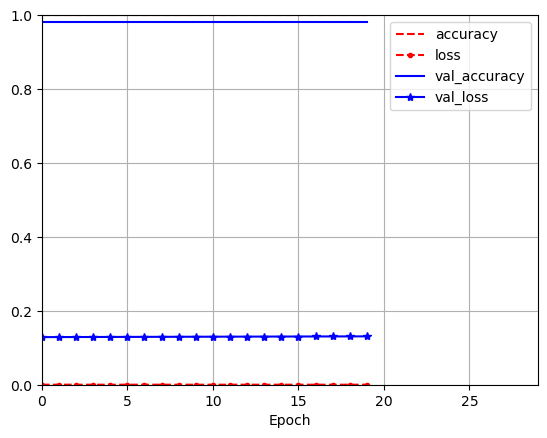

In [235]:
import pandas as pd
pd.DataFrame(history.history).plot(xlim = [0,29], ylim = [0,1], grid = True, xlabel = "Epoch",style = ["r--", "r--.", "b-", "b-*"])
plt.legend()
plt.show()

In [237]:
# Check the model on new data

X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.  , 0.  , 1.  , 1.  , 0.  , 0.9 , 0.  , 1.  , 0.99, 1.  ],
       [1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.93, 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.92, 0.01, 0.96, 0.  , 0.09, 0.79, 0.98, 0.  ]],
      dtype=float32)

In [239]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([3, 1, 1])

In [241]:
# Cross verify with y_test
y_test[:3]

array([7, 2, 1], dtype=uint8)

- Provide perfect prediction.

In [244]:
from sklearn.metrics import confusion_matrix, classification_report

In [245]:
# Now predict for whole X_test
y_proba = model.predict(x_test)
y_proba.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


array([[0.  , 0.  , 1.  , ..., 1.  , 0.99, 1.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.92, ..., 0.79, 0.98, 0.  ],
       ...,
       [0.  , 0.94, 0.  , ..., 1.  , 1.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.51],
       [0.97, 0.  , 0.54, ..., 0.  , 0.01, 0.  ]], dtype=float32)

In [247]:
y_pred = y_proba.argmax(axis = -1)
y_pred

array([3, 1, 1, ..., 4, 5, 6])

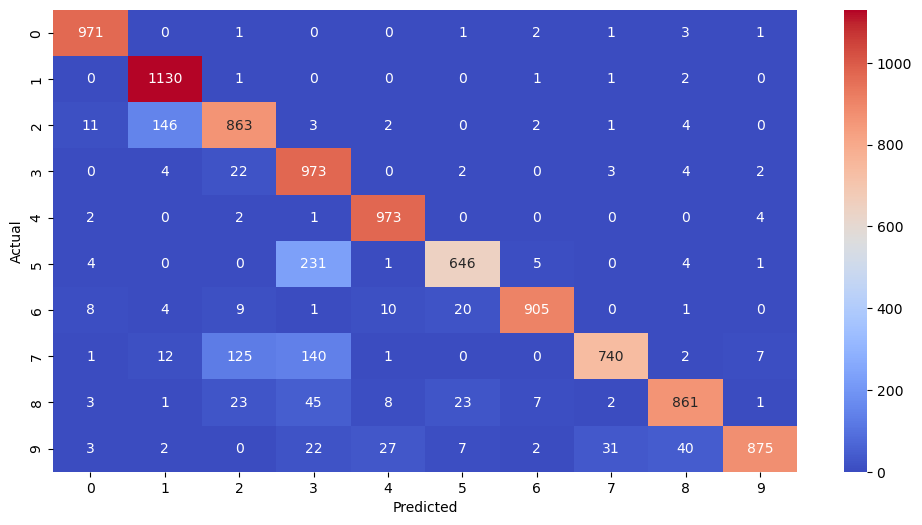

In [250]:
# Confusion Matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (12, 6))
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = "coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [252]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.87      1.00      0.93      1135
           2       0.83      0.84      0.83      1032
           3       0.69      0.96      0.80      1010
           4       0.95      0.99      0.97       982
           5       0.92      0.72      0.81       892
           6       0.98      0.94      0.96       958
           7       0.95      0.72      0.82      1028
           8       0.93      0.88      0.91       974
           9       0.98      0.87      0.92      1009

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.89     10000
weighted avg       0.91      0.89      0.89     10000



## Conclusion

- Even after accuracy of 98%, model is predicting correctly.

## Business Case

- Banking and Finance
  - Check Processing: Recognizing handwritten account numbers, amounts, and dates.
  - Loan Applications: Automating the digitization of handwritten forms.
- Logistics and Postal Services
  - Mail Sorting: Reading postal codes and addresses on envelopes and packages.
  - Package Tracking: Extracting handwritten tracking numbers for automated updates.
- Education
  - Exam Grading: Automating the evaluation of handwritten responses in tests.
  - Survey Analysis: Processing handwritten feedback for faster insights.
- Government and Healthcare
  - Census Data: Digitizing handwritten census forms.
  - Medical Records: Converting handwritten prescriptions and reports into digital formats.